In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

C:\Users\wjsrn\anaconda3\envs\py39t116\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.manual_seed(1)

In [6]:
x_train = [[1, 2, 1],
           [1, 3, 2],
           [1, 3, 4],
           [1, 5, 5],
           [1, 7, 5],
           [1, 2, 5],
           [1, 6, 6],
           [1, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [8]:
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 4, 4]]
y_test = [2, 2, 2]
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

In [9]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [10]:
model = SoftmaxClassifierModel()

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [15]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.cross_entropy(prediction, y_train)
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [19]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)
    
    print('Accuracy: {}% Cost: {:.6f}'.format(correct_count / len(y_test) * 100, cost.item()))

In [20]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.977591
Epoch    1/20 Cost: 0.971864
Epoch    2/20 Cost: 0.966240
Epoch    3/20 Cost: 0.960718
Epoch    4/20 Cost: 0.955295
Epoch    5/20 Cost: 0.949968
Epoch    6/20 Cost: 0.944736
Epoch    7/20 Cost: 0.939596
Epoch    8/20 Cost: 0.934546
Epoch    9/20 Cost: 0.929585
Epoch   10/20 Cost: 0.924709
Epoch   11/20 Cost: 0.919918
Epoch   12/20 Cost: 0.915210
Epoch   13/20 Cost: 0.910582
Epoch   14/20 Cost: 0.906033
Epoch   15/20 Cost: 0.901561
Epoch   16/20 Cost: 0.897164
Epoch   17/20 Cost: 0.892841
Epoch   18/20 Cost: 0.888590
Epoch   19/20 Cost: 0.884410


In [21]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.716558


In [22]:
#

In [23]:
model = SoftmaxClassifierModel()

In [24]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 1.007498
Epoch    2/20 Cost: 0.999968
Epoch    3/20 Cost: 0.992704
Epoch    4/20 Cost: 0.985657
Epoch    5/20 Cost: 0.978815
Epoch    6/20 Cost: 0.972169
Epoch    7/20 Cost: 0.965708
Epoch    8/20 Cost: 0.959425
Epoch    9/20 Cost: 0.953312
Epoch   10/20 Cost: 0.947360
Epoch   11/20 Cost: 0.941562
Epoch   12/20 Cost: 0.935913
Epoch   13/20 Cost: 0.930405
Epoch   14/20 Cost: 0.925033
Epoch   15/20 Cost: 0.919792
Epoch   16/20 Cost: 0.914675
Epoch   17/20 Cost: 0.909678
Epoch   18/20 Cost: 0.904796
Epoch   19/20 Cost: 0.900025


In [25]:
##

In [26]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [27]:
mu = x_train.mean(dim=0)

In [28]:
sigma = x_train.std(dim=0)

In [29]:
norm_x_train = (x_train - mu) / sigma

In [30]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [31]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    
    def forward(self, x):
        return self.linear(x)

In [32]:
model = MultivariateLinearRegressionModel()

In [33]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [34]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [35]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29547.708984
Epoch    1/20 Cost: 18766.755859
Epoch    2/20 Cost: 11969.090820
Epoch    3/20 Cost: 7648.307129
Epoch    4/20 Cost: 4891.651367
Epoch    5/20 Cost: 3129.900879
Epoch    6/20 Cost: 2003.104126
Epoch    7/20 Cost: 1282.158936
Epoch    8/20 Cost: 820.807800
Epoch    9/20 Cost: 525.552979
Epoch   10/20 Cost: 336.587708
Epoch   11/20 Cost: 215.644119
Epoch   12/20 Cost: 138.233063
Epoch   13/20 Cost: 88.683571
Epoch   14/20 Cost: 56.965141
Epoch   15/20 Cost: 36.658813
Epoch   16/20 Cost: 23.656643
Epoch   17/20 Cost: 15.329312
Epoch   18/20 Cost: 9.994032
Epoch   19/20 Cost: 6.574042


In [39]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [42]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [52]:
training_epochs = 15
batch_size = 100

In [40]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 18370832.72it/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28855572.61it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 13468982.29it/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4541246.43it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [44]:
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

In [47]:
import os
os.getcwd()

'C:\\Users\\wjsrn\\PYTHON\\PyTorch'

In [48]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [55]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [56]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [58]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.273198724
Epoch: 0002 cost = 0.271698356
Epoch: 0003 cost = 0.270595640
Epoch: 0004 cost = 0.269461066
Epoch: 0005 cost = 0.268240392
Epoch: 0006 cost = 0.267477363
Epoch: 0007 cost = 0.266426861
Epoch: 0008 cost = 0.265442967
Epoch: 0009 cost = 0.264997184
Epoch: 0010 cost = 0.264036328
Epoch: 0011 cost = 0.263292104
Epoch: 0012 cost = 0.262553990
Epoch: 0013 cost = 0.261901498
Epoch: 0014 cost = 0.261262864
Epoch: 0015 cost = 0.260655195
Learning finished


Accuracy: 0.8736000061035156
Label:  8
Prediction:  3


C:\Users\wjsrn\anaconda3\envs\py39t116\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\wjsrn\anaconda3\envs\py39t116\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


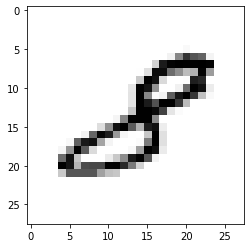

In [59]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()